In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_rent = pd.read_csv('aluguel.csv', sep=';')

In [3]:
df_rent.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [4]:
df_rent.shape

(32960, 9)

In [5]:
len(df_rent.Tipo.unique())

22

In [6]:
len(df_rent.Bairro.unique())

162

In [7]:
df_rent.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


As variáveis não descrevem bem o comportamento dos dados porque podem ser afetadas por extremos e não demonstram contexto por si só, apenas valores

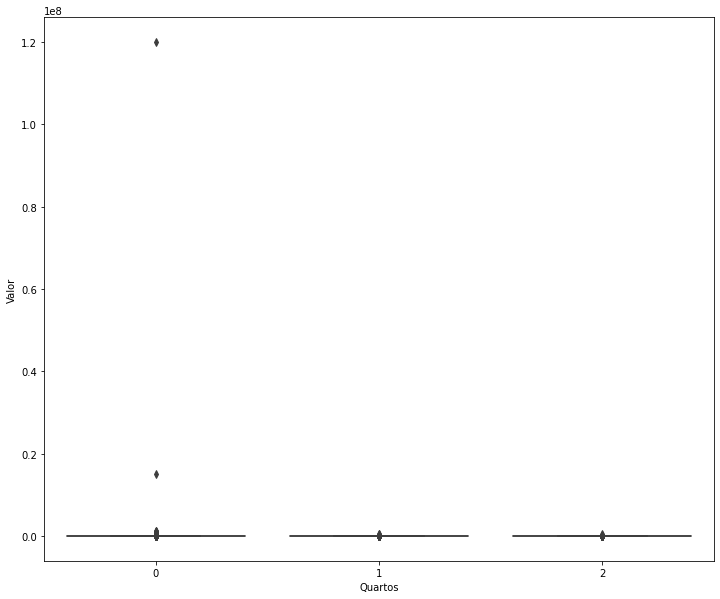

In [8]:
plt.figure(figsize=(12, 10))
sns.boxplot(x=df_rent.query('Quartos < 3')['Quartos'], y='Valor', data=df_rent);

Claramente, existem outliers tão grandes que estão confundindo o plot.

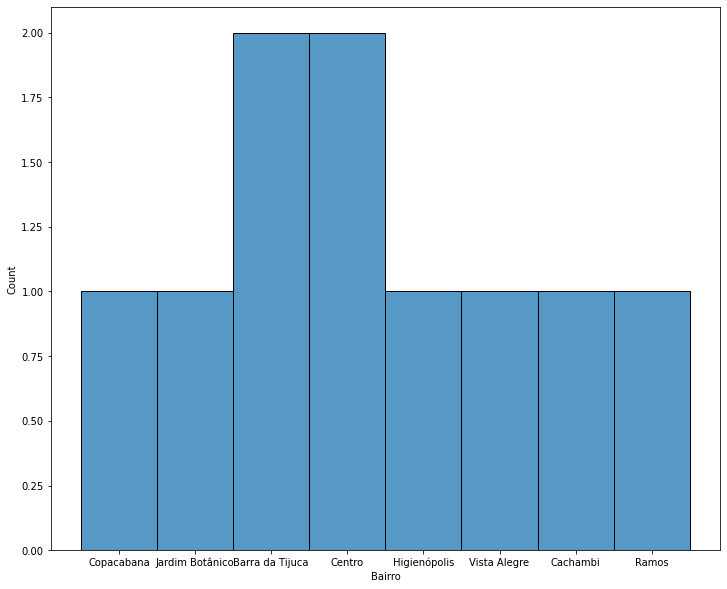

In [9]:
plt.figure(figsize=(12, 10))
sns.histplot(x=df_rent.head(10)['Bairro'], data=df_rent);

In [15]:
df_prices_by_neighbourhood = df_rent.sort_values('Valor', ascending=False).drop_duplicates(['Bairro'])
df_prices_by_neighbourhood.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5592,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0,NaN,10000.0
4595,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0,NaN,1000.0
23491,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN
25632,Prédio Inteiro,Humaitá,0,96,0,8279,1324640.0,165580.0,96889.0
26327,Conjunto Comercial/Sala,Caju,0,0,0,10660,1279200.0,NaN,NaN


In [17]:
print('Imóvel mais caro: ', df_prices_by_neighbourhood.Valor.max())

Imóvel mais caro:  120000000.0


In [18]:
print('Imóvel mais barato: ', df_prices_by_neighbourhood.Valor.min())

Imóvel mais barato:  670.0


In [22]:
df_rent.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [5]:
df_rent.query('Tipo == "Apartamento" | Tipo == "Casa"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [24]:
df_rent.query('Area < 100 & Area > 60')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
17,Flat,Botafogo,3,1,1,80,3800.0,1040.0,NaN
...,...,...,...,...,...,...,...,...,...
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN
32947,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


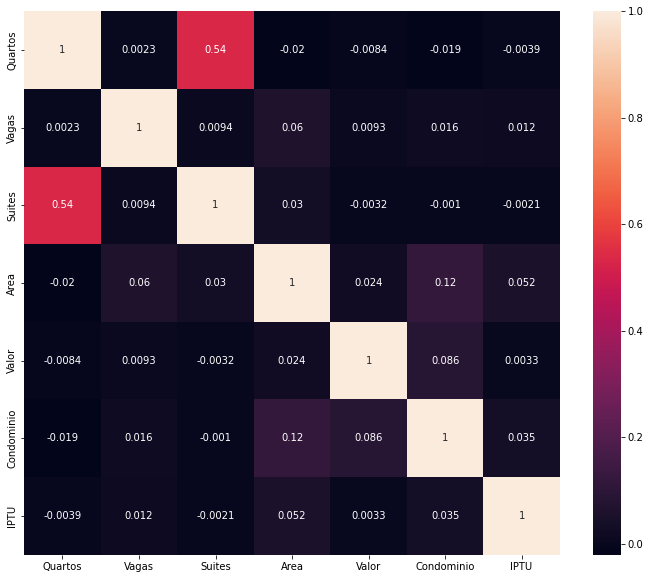

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_rent.corr(), annot=True);

Assumindo que "Valor" seria aluguel, possui correlação com condomínio mas não muito com IPTU.

In [30]:
df_rent.isnull().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

Os dados que tem na base provavelmente são suficientes para uma análise preditiva sim, porém sua precisão talvez não seja a mais alta. Apenas realizando um teste para saber.